In [1]:
print('Ritu')

Ritu


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('digits.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.drop('label',axis = 1)
y = df['label']

In [5]:
def show_image(x,title):
    plt.title(title)
    plt.imshow(x.values.reshape(28,28))
    plt.show()

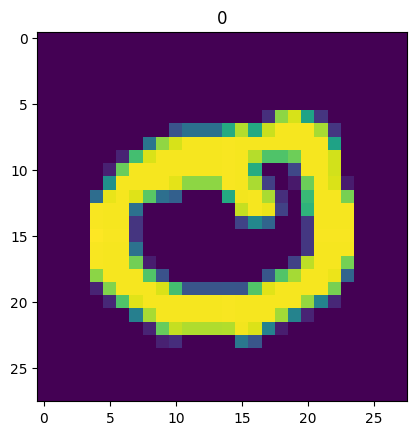

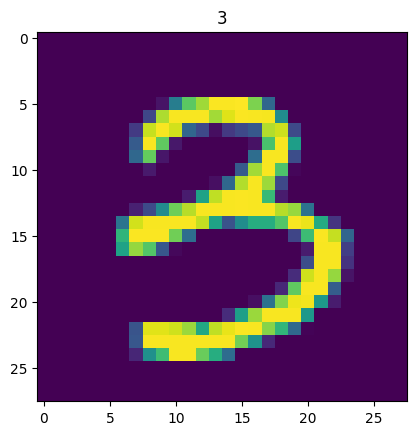

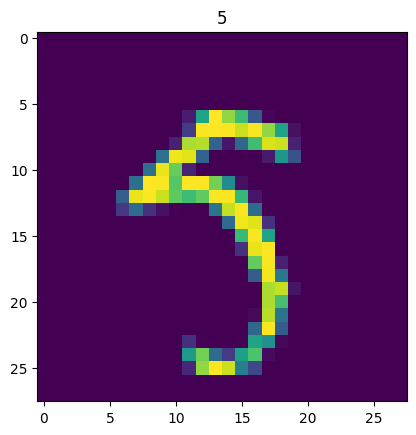

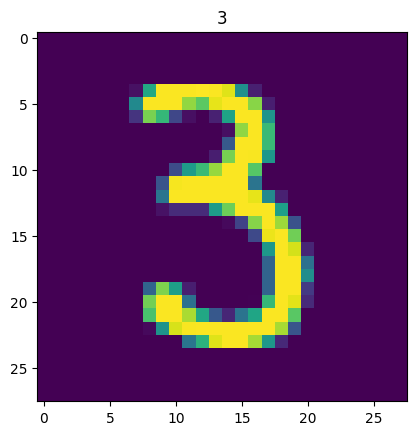

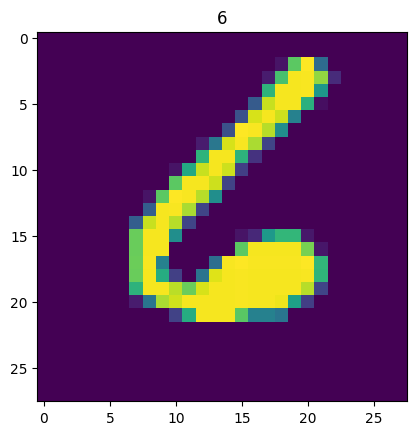

In [6]:
for i in range(5):
    ind = np.random.randint(len(X))
    show_image(X.loc[ind],y[ind])

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.23,random_state = 32001)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32340, 784)
(9660, 784)
(32340,)
(9660,)


In [9]:
sd = StandardScaler()
X_train_ = sd.fit_transform(X_train)
X_test_ = sd.transform(X_test)

traning time:  18.59856605529785
score : 0.9067287784679089
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       928
           1       0.95      0.97      0.96      1082
           2       0.90      0.88      0.89       956
           3       0.88      0.90      0.89       989
           4       0.91      0.92      0.91       941
           5       0.87      0.85      0.86       885
           6       0.92      0.93      0.93       944
           7       0.93      0.92      0.92      1042
           8       0.88      0.83      0.85       957
           9       0.88      0.89      0.89       936

    accuracy                           0.91      9660
   macro avg       0.91      0.91      0.91      9660
weighted avg       0.91      0.91      0.91      9660



<Axes: >

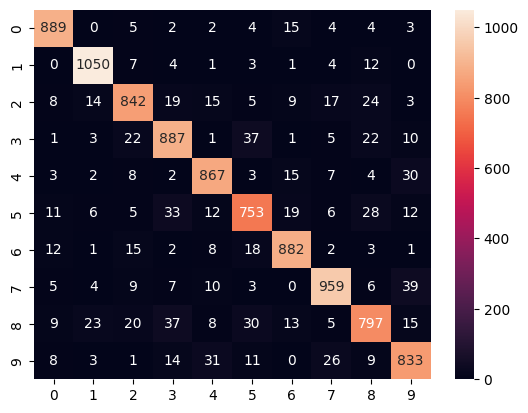

In [10]:
model1 = LogisticRegression(max_iter=100)
start = time.time()
model1.fit(X_train_,y_train)
print('traning time: ',time.time()-start)
y_pred = model1.predict(X_test_)
print('score :',model1.score(X_test_,y_test))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

In [11]:
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X_train_)

In [12]:
X_pca.shape

(32340, 528)

In [13]:
X_train_.shape

(32340, 784)

In [14]:
pca1 = PCA(n_components = 100)
X_pca1 = pca1.fit_transform(X_train_)
X_pca1.shape

(32340, 100)

In [15]:
pca1.explained_variance_

array([40.65526154, 29.14075652, 26.82713886, 20.7927174 , 18.16754634,
       15.74924425, 13.82057782, 12.59058265, 11.0344622 , 10.08009965,
        9.60860954,  8.68058565,  8.04035484,  7.88737574,  7.46167685,
        7.18872177,  6.81056483,  6.60771864,  6.41077278,  6.31439624,
        5.97527902,  5.77949162,  5.49446303,  5.32858463,  5.14328347,
        4.99393085,  4.89644602,  4.70471263,  4.49989037,  4.42448326,
        4.39409764,  4.21193443,  4.1484971 ,  4.08244121,  4.02183168,
        3.96390486,  3.89398248,  3.73364171,  3.69693408,  3.56222489,
        3.4464963 ,  3.42046225,  3.37239297,  3.27532511,  3.21201438,
        3.19430144,  3.12315382,  3.09616757,  3.05943109,  3.02809113,
        2.99417477,  2.93555665,  2.90642277,  2.82377649,  2.81877347,
        2.80226966,  2.76108994,  2.67109449,  2.63202491,  2.58825351,
        2.56646938,  2.49942842,  2.46239286,  2.45793196,  2.42730987,
        2.41534531,  2.35210864,  2.34630027,  2.31307741,  2.27

In [16]:
pca1.explained_variance_ratio_.sum()

0.7201193126108181

In [40]:
pca  = PCA()
X_pca = pca.fit_transform(X_train_)
X_pca.shape
pca.explained_variance_ratio_.sum()

0.9999999999999999

In [41]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05766525, 0.09899838, 0.13704989, 0.16654219, 0.19231096,
       0.21464962, 0.23425268, 0.25211111, 0.26776234, 0.28205991,
       0.29568872, 0.30800123, 0.31940564, 0.33059306, 0.34117667,
       0.35137312, 0.3610332 , 0.37040556, 0.37949857, 0.38845489,
       0.3969302 , 0.40512781, 0.41292113, 0.42047917, 0.42777438,
       0.43485775, 0.44180285, 0.448476  , 0.45485862, 0.46113429,
       0.46736686, 0.47334105, 0.47922526, 0.48501578, 0.49072033,
       0.49634272, 0.50186593, 0.50716171, 0.51240542, 0.51745807,
       0.52234656, 0.52719813, 0.53198152, 0.53662723, 0.54118314,
       0.54571392, 0.55014379, 0.55453538, 0.55887487, 0.5631699 ,
       0.56741682, 0.5715806 , 0.57570306, 0.5797083 , 0.58370643,
       0.58768116, 0.59159748, 0.59538615, 0.5991194 , 0.60279057,
       0.60643084, 0.60997602, 0.61346866, 0.61695499, 0.62039787,
       0.62382379, 0.62716001, 0.63048799, 0.63376885, 0.63699658,
       0.64020914, 0.64336394, 0.64650133, 0.64955476, 0.65257

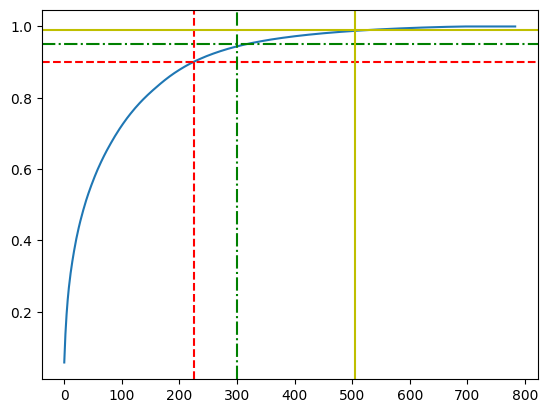

In [42]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.9,c = 'r',ls = '--')
plt.axvline(225,c = 'r',ls = '--')
plt.axhline(0.95,c = 'g',ls = '-.')
plt.axvline(300,c = 'g',ls = '-.')
plt.axhline(0.99,c = 'y',ls = '-')
plt.axvline(505,c = 'y',ls = '-')

(32340, 225)
traning time:  6.18258810043335
score : 0.9225672877846791
cross val :  0.920404761904762
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       928
           1       0.96      0.97      0.97      1082
           2       0.92      0.90      0.91       956
           3       0.91      0.91      0.91       989
           4       0.93      0.93      0.93       941
           5       0.88      0.89      0.89       885
           6       0.94      0.95      0.94       944
           7       0.95      0.93      0.94      1042
           8       0.90      0.86      0.88       957
           9       0.90      0.91      0.91       936

    accuracy                           0.92      9660
   macro avg       0.92      0.92      0.92      9660
weighted avg       0.92      0.92      0.92      9660



<Axes: >

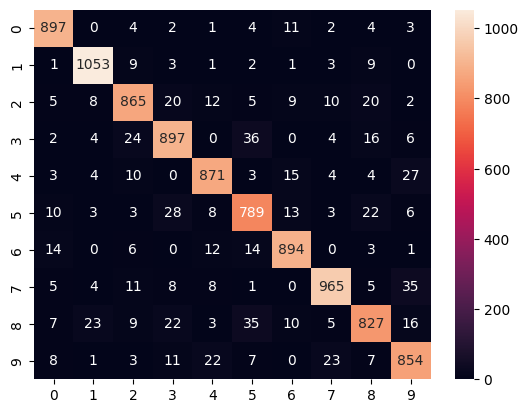

In [20]:
pca2  = PCA(225)
X_train2 = pca2.fit_transform(X_train_)
X_test2 = pca2.transform(X_test_)
X2 = pca2.transform(X)
print(X_train2.shape)
# pca2.explained_variance_ratio_.sum()

model2 = LogisticRegression(max_iter=100)
start = time.time()
model2.fit(X_train2,y_train)
print('traning time: ',time.time()-start)
y_pred = model2.predict(X_test2)
print('score :',model2.score(X_test2,y_test))
print('cross val : ',np.mean(cross_val_score(LogisticRegression(),X2,y,cv = 5)))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

(32340, 300)
traning time:  9.07605767250061
score : 0.9231884057971015
cross val :  0.9206904761904762
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       928
           1       0.96      0.98      0.97      1082
           2       0.91      0.90      0.91       956
           3       0.90      0.91      0.91       989
           4       0.93      0.93      0.93       941
           5       0.89      0.90      0.89       885
           6       0.94      0.95      0.94       944
           7       0.94      0.93      0.93      1042
           8       0.90      0.86      0.88       957
           9       0.90      0.91      0.91       936

    accuracy                           0.92      9660
   macro avg       0.92      0.92      0.92      9660
weighted avg       0.92      0.92      0.92      9660



<Axes: >

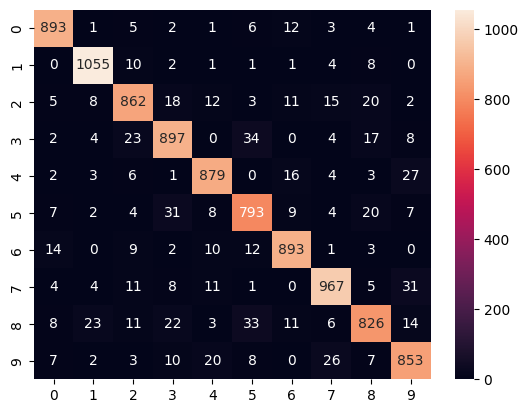

In [21]:
pca3  = PCA(300)
X_train3 = pca3.fit_transform(X_train_)
X_test3 = pca3.transform(X_test_)
X3 = pca3.transform(X)
print(X_train3.shape)
# pca2.explained_variance_ratio_.sum()

model3 = LogisticRegression(max_iter=100)
start = time.time()
model3.fit(X_train3,y_train)
print('traning time: ',time.time()-start)
y_pred = model3.predict(X_test3)
print('score :',model3.score(X_test3,y_test))
print('cross val : ',np.mean(cross_val_score(LogisticRegression(),X3,y,cv = 5)))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

(32340, 300)
traning time:  7.637690544128418
score : 0.9231884057971015
cross val :  0.9206904761904762
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       928
           1       0.96      0.98      0.97      1082
           2       0.91      0.90      0.91       956
           3       0.90      0.91      0.91       989
           4       0.93      0.93      0.93       941
           5       0.89      0.90      0.89       885
           6       0.94      0.95      0.94       944
           7       0.94      0.93      0.93      1042
           8       0.90      0.86      0.88       957
           9       0.90      0.91      0.91       936

    accuracy                           0.92      9660
   macro avg       0.92      0.92      0.92      9660
weighted avg       0.92      0.92      0.92      9660



<Axes: >

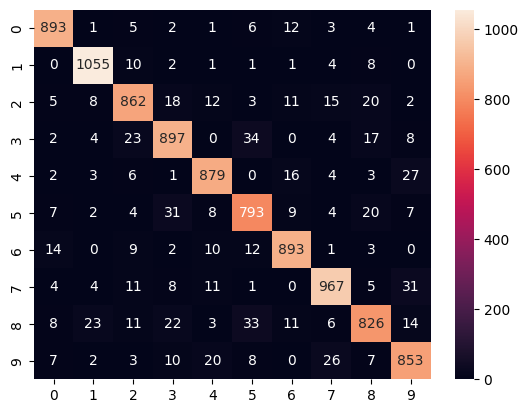

In [22]:
pca4  = PCA(300)
X_train4 = pca4.fit_transform(X_train_)
X_test4 = pca4.transform(X_test_)
X4 = pca4.transform(X)
print(X_train4.shape)
# pca4.explained_variance_ratio_.sum()

model4 = LogisticRegression(max_iter=100)
start = time.time()
model4.fit(X_train4,y_train)
print('traning time: ',time.time()-start)
y_pred = model4.predict(X_test4)
print('score :',model4.score(X_test4,y_test))
print('cross val : ',np.mean(cross_val_score(LogisticRegression(),X4,y,cv = 5)))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

In [23]:
param_grid = {
    'penalty' :['l1', 'l2', 'elasticnet', None],
    'C':[0.001,0.01,0.1,1,],
}

In [24]:
grid_search = GridSearchCV(LogisticRegression(),param_grid)

In [25]:
grid_search.fit(X2,y)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [27]:
grid_search.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [28]:
grid_search.best_score_

0.9205

In [30]:
print(grid_search.best_estimator_)

LogisticRegression(C=0.001)


In [31]:
X_trainf,X_testf,y_trainf,y_testf = train_test_split(X,y,test_size = 0.23,random_state = 32001)
print(X_trainf.shape)
print(X_testf.shape)
print(y_trainf.shape)
print(y_testf.shape)

(32340, 784)
(9660, 784)
(32340,)
(9660,)


In [43]:
pipeline= Pipeline([('scaler',StandardScaler()),
                    ('pca',PCA(225)),
                    ('logistic',LogisticRegression(C= 0.001, penalty = 'l2'))
                    ])
pipeline.fit(X_trainf,y_trainf)
y_pred = pipeline.predict(X_testf)
pipeline.score(X_testf,y_testf)

0.9157349896480331

In [44]:
# pipeline.predict([])
X_testf.shape

(9660, 784)

In [51]:
X_testf.iloc[[0]].shape

(1, 784)

In [53]:
pipeline.predict(X_testf.iloc[[0]])

array([1])

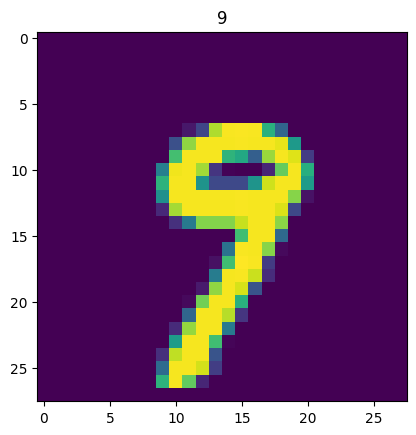

In [59]:
plt.title(pipeline.predict(X_testf.iloc[[47]])[0])
plt.imshow(X_testf.iloc[47].values.reshape(28,28))